## | 🎯 Perguntas Norteadoras de Negócio
* Quais características mais influenciam na rotatividade de funcionários?
* Qual perfil de colaborador tem maior propensão a sair da empresa?
* Um modelo de machine learning pode prever com boa precisão a saída de um
funcionário?
* Que ações a empresa pode tomar com base nessas previsões?


## | 🔍 DATASET OVERVIEW

### 📂 Variáveis

* **Age:** Idade do funcionário (em anos).  
* **Attrition:** Indica se o funcionário deixou a empresa (Yes/No).  
* **BusinessTravel:** Frequência de viagens a trabalho (ex: "Travel_Rarely", "Travel_Frequently", "Non-Travel").  
* **DailyRate:** Diária, valor de um dia de trabalho(valor numérico).  
* **Department:** Departamento do funcionário (ex: "Sales", "Research & Development", "Human Resources").  
* **DistanceFromHome:** Distância entre casa e trabalho (em km).  
* **Education:** Nível educacional (1-5, onde 1="Below College", 5="Doctor").  
* **EducationField:** Área de formação (ex: "Life Sciences", "Medical", "Technical Degree").  
* **EmployeeCount:** Contagem de funcionários (normalmente 1 para registros individuais).  
* **EmployeeNumber:** ID único do funcionário.  
* **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho (escala numérica, normalmente 1-4).  
* **Gender:** Gênero ("Male" ou "Female").  
* **HourlyRate:** Remuneração por hora.  
* **JobInvolvement:** Engajamento no trabalho (escala numérica, ex: 1-4).  
* **JobLevel:** Nível hierárquico (1=júnior, 5=sênior).  
* **JobRole:** Cargo ocupado (ex: "Sales Executive", "Research Scientist").  
* **JobSatisfaction:** Satisfação com o trabalho (escala numérica, ex: 1-4).  
* **MaritalStatus:** Estado civil ("Single", "Married", "Divorced").  
* **MonthlyIncome:** Salário mensal bruto.  
* **MonthlyRate:** Salário mensal base.  
* **NumCompaniesWorked:** Número de empresas onde já trabalhou.  
* **Over18:** Se é maior de 18 anos (normalmente "Yes" para todos).  
* **OverTime:** Faz horas extras ("Yes" ou "No").  
* **PercentSalaryHike:** Percentual do último aumento salarial.  
* **PerformanceRating:** Avaliação de desempenho (ex: 1-5).  
* **RelationshipSatisfaction:** Satisfação com relacionamentos no trabalho (escala numérica).  
* **StandardHours:** Carga horária padrão (ex: 80 horas/mês).  
* **StockOptionLevel:** Nível de opções de ações (ex: 0-3).  
* **TotalWorkingYears:** Total de anos de experiência profissional.  
* **TrainingTimesLastYear:** Número de treinamentos no último ano.  
* **WorkLifeBalance:** Equilíbrio vida-trabalho (escala numérica).  
* **YearsAtCompany:** Tempo na empresa atual (em anos).  
* **YearsInCurrentRole:** Tempo no cargo atual (em anos).  
* **YearsSinceLastPromotion:** Tempo desde a última promoção (em anos).  
* **YearsWithCurrManager:** Tempo com o mesmo gerente (em anos).




### 📂 Referência

**Title**: IBM HR Analytics Employee Attrition & Performance  
**Source**: [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)  
**Author**: pavansubhash  
**License**: Database Contents License (DbCL) v1.0





## | 📚 IMPORT DE BIBLIOTECA

In [1]:
# Silenciar WARNINGS
import warnings
warnings.filterwarnings('ignore')

# Biblioteca para montar drive no colab
from google.colab import drive

# Biblioteca para manipulação dos dados
import pandas as pd
import numpy as np

# Bibliotecas para testes estatísticos
from scipy.stats import shapiro, skew
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Bibliotecas para visualização
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import panel as pn
import plotly.express as px

# Biblioteca para aprendizado de máquina
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


## | 📂 LEITURA DE DADOS

In [2]:
# Cria drive no colab
drive.mount('/content/drive', force_remount=True)

# Especifica caminho do arquivo a ser lido
caminho = '/content/drive/MyDrive/bancos/RH-DATASET.csv'

Mounted at /content/drive


In [3]:
# Instancia variável atribuindo arquivo
df = pd.read_csv(caminho)

## | ☑️ DATA WRANGLING

In [4]:
# Visualizar 5 primeiras linhas
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Visualiza as colunas do datset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# Visualiza informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Checa se há ids repetidos
df['EmployeeNumber'].duplicated().value_counts()

,count
EmployeeNumber,
False,1470


In [8]:
# Dicionário para entender a cardinalidade, verificar se os tipos estão corretos e entender os valores de baixa cardinalidade

# Imprime valores únicos caso cardinalidade seja no máximo 15

dic = pd.DataFrame({
    'Tipo': df.dtypes,
    'Total Valores únicos': df.nunique(),
    'Valores mais frequentes': df.mode().iloc[0],
    'Valores únicos': df.apply(lambda x: list(x.unique()) if x.nunique()<=15 else "N/A")
})

print('🗃️ Resumo de informações:')
dic

🗃️ Resumo de informações:


,Tipo,Total Valores únicos,Valores mais frequentes,Valores únicos
Age,int64,43,35.0,N/A
Attrition,object,2,No,"[Yes, No]"
BusinessTravel,object,3,Travel_Rarely,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
DailyRate,int64,886,691.0,N/A
Department,object,3,Research & Development,"[Sales, Research & Development, Human Resources]"
DistanceFromHome,int64,29,2.0,N/A
Education,int64,5,3.0,"[2, 1, 4, 3, 5]"
EducationField,object,6,Life Sciences,"[Life Sciences, Other, Medical, Marketing, Tec..."
EmployeeCount,int64,1,1.0,[1]
EmployeeNumber,int64,1470,1,N/A


In [9]:
# Função para testar a normalidade das colunas numéricas
def test_normalidade(coluna):
  w_stat,p_value = shapiro(coluna)
  return "Normal" if p_value > 0.05 else "Não normal"

# Seleciona colunas numéricas
num = df.select_dtypes(include=['number'])

# Testa normalidade em cada coluna com apply()
dis_normal = num.apply(test_normalidade)

# Calcula assimetria (skewness) em cada coluna
assimetria = num.skew().round(4)

# Dataframe com as informaçções por coluna
resumo = pd.DataFrame({
    'Distribuição (Shapiro-Wilk)': dis_normal,
    ' Assimetria': assimetria
})

resumo

,Distribuição (Shapiro-Wilk),Assimetria
Age,Não normal,0.4133
DailyRate,Não normal,-0.0035
DistanceFromHome,Não normal,0.9581
Education,Não normal,-0.2897
EmployeeCount,Normal,0.0000
EmployeeNumber,Não normal,0.0166
EnvironmentSatisfaction,Não normal,-0.3217
HourlyRate,Não normal,-0.0323
JobInvolvement,Não normal,-0.4984
JobLevel,Não normal,1.0254


### 📑 Resumo executivo Data Wrangling

* 35 colunas e 1470 linhas
* Não há 'missing values'
* Não há ids ('EmployeeNumber') repetidos
* Colunas numéricas: apenas duas tem distribuição normal, as demais possuem distribuição assimétrica, majoritariamente positivo


#### 🟩 Classificação das variáveis

* **Variáveis categóricas nominal:** 'Attrition' (Variável target), 'Department', 'EducationField', 'EmployeeNumber', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime',
* **Variáveis categóricas ordinal:** 'BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction','JobLevel', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel'.
* **Variáveis numéricas contínuas:** 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate',
* **Variáveis numéricas discretas:** 'Age', 'DailyRate', 'EmployeeCount', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany' 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'.

#### 🟩 Tratamentos aplicados

* 'StockOptionLevel' o nível disponível para escolha é definido pela empresa, que usualmente defini os requisitos baseados em senioridade e até performance, por isto classifiquei como categórica ordinal
* As colunas 'EmployeeCount', 'Over18' apresentam valores constantes, sendo desinteressantes para a análise, por isto serão removidas
*  'EmployeeNumber' é o id de identificação, também será removido
* Transformação dos dtypes de todas as variáves categóricas para 'category"

In [10]:
# Faz cópia do df original
df_tratado= df.copy()

# Dropa colunas não informativas
df_tratado = df_tratado.drop(columns=['EmployeeCount', 'Over18','EmployeeNumber'], axis=1)

In [11]:
# Transforma dtype das variáveis categóricas nominais
# Lista de colunas nominais
colunas_nominais = [
    'Attrition', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'OverTime', 'BusinessTravel'
]

df_tratado[colunas_nominais] = df_tratado[colunas_nominais].astype('category')

In [12]:
# Transforma dtype das variáveis categóricas ordinais
# Lista de colunas ordinais
# Todas as colunas ordinais são numéricas
colunas_ordinais = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction','JobLevel', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel'
]

# Transforma Dtypes preservando a hierarquia dentro de cada feature ordinal
for column in colunas_ordinais:
  df_tratado[column] = pd.Categorical(df_tratado[column], categories = sorted(df[column].unique()), ordered= True)


In [13]:
# Checa transformações nos tipos de variáveis
df_tratado.dtypes

,0
Age,int64
Attrition,category
BusinessTravel,category
DailyRate,int64
Department,category
DistanceFromHome,int64
Education,category
EducationField,category
EnvironmentSatisfaction,category
Gender,category


## | 📊 ANÁLISE EXPLORATÓRIA


#### **Análise exploratória univariada**

In [14]:
# Imprime dados estatísticos das variáveis numéricas
df_tratado.describe(include=['number'])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
# Imprime dados das frequências das variáveis categóricas
df_tratado.describe(include=['category'])

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,5,6,4,2,4,5,9,4,3,2,2,4,4,4
top,No,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,3,1,Sales Executive,4,Married,No,3,3,0,3
freq,1233,1043,961,572,606,453,882,868,543,326,459,673,1054,1244,459,631,893


In [16]:
# Inicializa paleta de cores para reutilização nos gráficos
palette = {
    # Cores da interface (mantive o fundo claro para legibilidade)
    'background': '#FFFFFF',
    'text': '#08415C', # Usando o azul escuro para o texto principal
    'grid': '#D3D3D3', # Um cinza claro para as grades

    # Cores principais para dados e destaques
    'primary': '#08415C',    # Indigo dye
    'accent': '#CC2936',     # Persian red
    'secondary': '#F1BF98',  # Peach
    'gray1': '#6B818C',      # Slate gray

    # Cores para linhas estatísticas (média, mediana)
    'mean': '#CC2936',       # O vermelho para dar bastante destaque à média
    'median': '#6B818C'      # O cinza ardósia para a mediana
}

In [17]:
# Garante que o Plotly funcione bem com o Panel aqui no Colab
pn.extension('plotly')

# Definindo as listas de colunas
colunas_numericas = df_tratado.select_dtypes(include=np.number).columns.tolist()
colunas_categoricas = df_tratado.select_dtypes(include=['category']).drop('Gender', axis=1, errors='ignore').columns.tolist()


# Cria Widget para filtrar por gênero
gender_filter = pn.widgets.Select(
    name='Filtrar por gênero',
    options=['All'] + list(df['Gender'].unique())
)

# Cria widget para selecionar a variável a ser analisada
variable_selector = pn.widgets.Select(
    name='Selecionar Variável',
    options=colunas_numericas + colunas_categoricas
)


# O decorator agora "escuta" as mudanças nos dois widgets
@pn.depends(gender_filter.param.value, variable_selector.param.value)
def update_plots(gender_val, variable_val):

    # Filtra o DataFrame com base no gênero
    filtered_df = df_tratado.copy()
    if gender_val != 'All':
        filtered_df = filtered_df[filtered_df['Gender'] == gender_val]

    # LÓGICA IF/ELSE PARA TRATAR VARIÁVEIS NUMÉRICAS E CATEGÓRICAS
    # SE A VARIÁVEL FOR NUMÉRICA
    if variable_val in colunas_numericas:
        # Cálculo estatístico para a variável selecionada
        stats = {
            'mean': filtered_df[variable_val].mean(),
            'median': filtered_df[variable_val].median()
        }

        # 1. Histograma (generalizado para a variável selecionada)
        hist = px.histogram(
            filtered_df, x=variable_val, nbins=30,
            color=None if gender_val != 'All' else 'Gender',
            color_discrete_map={'Female': palette['primary'], 'Male': palette['accent']},
            title=f'<b style="color:{palette["primary"]}">Distribuição de {variable_val}</b>'
        )

        # Adiciona a linha da MÉDIA
        hist.add_vline(x=stats['mean'], line=dict(color=palette['mean'], width=2, dash='dash'),
                        annotation_text=f"Média: {stats['mean']:.2f}")

        # 2. Boxplot (generalizado para a variável selecionada)
        box = px.box(
            filtered_df, y=variable_val,
            x=None if gender_val != 'All' else 'Gender',
            color=None if gender_val != 'All' else 'Gender',
            color_discrete_map={'Female': palette['primary'], 'Male': palette['accent']},
            title=f'<b style="color:{palette["primary"]}">Boxplot de {variable_val}</b>'
        )

        return pn.Row(hist, box, sizing_mode='stretch_width')

    # SE A VARIÁVEL FOR CATEGÓRICA
    elif variable_val in colunas_categoricas:
        # Calcula a contagem de cada categoria
        counts = filtered_df[variable_val].value_counts().reset_index()
        counts.columns = ['Categoria', 'Contagem']

        # Cria o gráfico de barras
        bar_chart = px.bar(
            counts, x='Categoria', y='Contagem', text_auto=True,
            title=f'<b style="color:{palette["primary"]}">Distribuição de {variable_val}</b>'
        )
        return bar_chart


# Monta dashboard final
dashboard = pn.Column(
    pn.Row(
        pn.pane.Markdown("## Análise de Desempenho Acadêmico"),
        gender_filter,
        variable_selector, # Novo dropdown adicionado aqui
        styles={'background': palette['background'], 'padding': '10px'}
    ),
    update_plots,
    styles={'background': 'white', 'border': f"1px solid {palette['gray1']}"},
    sizing_mode='stretch_width'
)

dashboard.servable()

Column(sizing_mode='stretch_width', styles={'background': 'white', ...})
    [0] Row(styles={'background': '#FFFFFF', ...})
        [0] Markdown(str)
        [1] Select(name='Filtrar por gênero', options=['All', 'Female', 'Male'], value='All')
        [2] Select(name='Selecionar Variável', options=['Age', 'DailyRate', ...], value='Age')
    [1] ParamFunction(function, _pane=Row, defer_load=False)

In [18]:
# Calcula % de gênero
df_tratado['Gender'].value_counts(normalize=True)

,proportion
Gender,
Male,0.6
Female,0.4


In [19]:
# Visualizando os detalhes de pessoas que responderam 0 para o número de companias trabalhadas
df_tratado[df_tratado['NumCompaniesWorked']==0]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,80,0,8,2,2,7,7,3,6
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,...,2,80,0,10,2,3,9,7,1,8
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,Male,...,3,80,1,6,5,3,5,4,0,3
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,4,Female,...,4,80,0,10,3,3,9,5,0,8
13,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,2,Male,...,3,80,1,3,2,3,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,36,No,Travel_Rarely,557,Sales,3,3,Medical,1,Female,...,3,80,2,10,2,3,9,7,3,4
1445,41,No,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,Female,...,3,80,1,21,3,3,20,7,0,10
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,2,Female,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,2,Male,...,2,80,0,10,2,3,9,4,1,7


In [20]:
# Teste Mann-Whitney U para comparar medianas dos salários


##### 📑 Resumo Executivo - Análise Exploratória Univariada

* 60% gênero masculino e 40% gênero feminino.

* Idade: varia de 18 a 60 anos, com mediana de 36 anos.

* Diárias (DailyRate): a mediana para o gênero feminino (825.5) é maior que a mediana para o gênero masculino (783), (VERIFICAR SE HÁ DIFERENÇA ESTATÍSTICA ENTRE OS VALORES).

* Distância de casa: os dois grupos tem distribuição similar, 75% moram a no mínimo 14 unidades de distância do trabalho, e 50% a menos de 7.

* Salário por hora (HourlyRate) e salário mensal (MonthlyIncome): a mediana do grupo feminino é levemente superior que a mediana do grupo masculino para as duas métricas, 67 contra 65 e 5.081,5 contra 4.837,5. Como esperado para distribuição de salário, os salários altos puxam a assimetria para a direita.

* Número de companias trabalhadas: assumi que a coluna se refere a companias diferentes da atual, sendo assim, por adoção aquelas colunas atribuídas com 0 referem-se as pessoas que trabaharam apenas na compania em que foi realizada a pesquisa. No conjunto de dados avaliados, as mulheres tem mediana(2) de companias maior que a dos homens(1).

* A mediana de aumento salarial é igual para os dois gêneros (~14%).

* A análise de tempo na função atual mostra que o terceiro quartil (Q3) da distribuição é de 7 anos, indicando que 75% dos colaboradores estão em seus cargos por um período igual ou inferior a este. Ao segmentar por gênero, observa-se que não há diferença na tendência central, pois a mediana de tempo no cargo é a mesma para homens e mulheres. No entanto, ao analisar os anos desde a última promoção, a diferença entre os gêneros se torna evidente. Para 75% dos homens, a última promoção ocorreu em um período de até 2 anos, enquanto para 75% das mulheres, esse mesmo período se estende para até 3 anos.

* Analisando o perfil de evasão, observa-se uma disparidade de gênero: a proporção de homens que deixaram a empresa (63%) é consideravelmente maior que a de mulheres (37%).

* O departamento de 'Research & Development' concentra a maioria dos funcionários (65%), seguido por 'Sales' (30%) e 'Human Resources' com os 5% restantes.

* Um ponto de atenção é a baixa satisfação geral, tanto com o relacionamento interpessoal quanto com o trabalho em si, ambas reportadas por 39% dos colaboradores. Ao analisar o perfil desses grupos insatisfeitos, nota-se uma predominância masculina. Na baixa satisfação com o relacionamento, os homens representam 60% dos impactados, enquanto na insatisfação com o trabalho, eles compõem 59% do grupo.




####  **Análise exploratória multivariada**


* Pré-processamento

In [21]:
#  One-Hot Encoding nas colunas nominais
# Instancia objeto com drop da primeira categoria pra economizar memória
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int64)

# Aplica transformação
dados_ohe = ohe.fit_transform(df_tratado[colunas_nominais])

# Cria dataframe com os nomes corretos e mantem o índice pra evitar problemas
df_dummies = pd.DataFrame(dados_ohe, columns = ohe.get_feature_names_out(colunas_nominais), index=df_tratado.index)

# Concatena variáveis dummy com df removendo nominais
df_final = pd.concat([df_tratado.drop(columns=colunas_nominais), df_dummies], axis=1)


* Visualização multivariada

In [22]:
# Checa operação anterior
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,1,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,1,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,1,0,1,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,1,0,0,0,1


In [23]:
# Matriz de correlação
corr_matriz = df_final.corr(method= 'spearman')

print( " Matriz de correlação:\n")
corr_matriz


 Matriz de correlação:



,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
Age,1.000000,0.007290,-0.019291,0.204937,0.009820,0.028858,0.034456,0.489618,-0.005185,0.471902,...,0.053102,0.184877,-0.152827,-0.001102,-0.174193,0.077494,-0.113026,0.027044,-0.021040,0.018513
DailyRate,0.007290,1.000000,-0.002754,-0.013607,0.018961,0.023511,0.042469,0.003816,0.027829,0.016260,...,-0.005780,0.000897,-0.002829,-0.000181,0.005845,0.040180,-0.076012,0.008383,-0.012103,0.002207
DistanceFromHome,-0.019291,-0.002754,1.000000,0.015708,-0.010401,0.020446,0.034430,0.022148,-0.013078,0.002512,...,-0.003774,-0.018166,-0.016738,0.044678,-0.005625,0.017019,-0.026259,0.036639,-0.008361,-0.004095
Education,0.204937,-0.013607,0.015708,1.000000,-0.027625,0.014432,0.037231,0.107419,-0.005175,0.120028,...,-0.008335,0.046079,0.004425,0.051082,-0.083289,-0.001209,0.006131,-0.017003,-0.006252,0.002990
EnvironmentSatisfaction,0.009820,0.018961,-0.010401,-0.027625,1.000000,-0.052380,-0.015301,-0.000192,-0.002993,-0.015163,...,0.059655,-0.046003,0.003960,-0.024693,-0.001975,-0.028464,0.013736,0.067670,-0.010527,0.007131
HourlyRate,0.028858,0.023511,0.020446,0.014432,-0.052380,1.000000,0.043884,-0.033876,-0.068340,-0.019762,...,-0.013724,-0.025475,0.019262,-0.012116,-0.018345,0.035371,-0.032502,-0.009140,-0.019292,0.028003
JobInvolvement,0.034456,0.042469,0.034430,0.037231,-0.015301,0.043884,1.000000,-0.018424,-0.012148,-0.024552,...,-0.024833,0.016192,0.044358,-0.010484,-0.022248,0.022918,-0.046740,-0.001866,0.006497,0.019436
JobLevel,0.489618,0.003816,0.022148,0.107419,-0.000192,-0.033876,-0.018424,1.000000,-0.000852,0.920429,...,0.188223,0.348861,-0.439853,0.251200,-0.254342,0.050213,-0.090430,-0.000394,-0.016058,0.008832
JobSatisfaction,-0.005185,0.027829,-0.013078,-0.005175,-0.002993,-0.068340,-0.012148,-0.000852,1.000000,0.004881,...,-0.018089,-0.008418,0.020304,0.017436,-0.002888,-0.013665,0.026268,0.028522,0.027756,-0.034014
MonthlyIncome,0.471902,0.016260,0.002512,0.120028,-0.015163,-0.019762,-0.024552,0.920429,0.004881,1.000000,...,0.172164,0.353586,-0.414874,0.249681,-0.275992,0.058929,-0.091288,0.008910,-0.024672,0.029016


--- Correlação de cada variável com 'Attrition_Yes' ---

OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.079248
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
JobRole_Human Resources              0.036215
NumCompaniesWorked                   0.030505
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015258
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006692
EducationField_Other                -0.017898
PercentSalaryHike                   -0.023612
Education                           -0.030346
EducationField_Life Sci

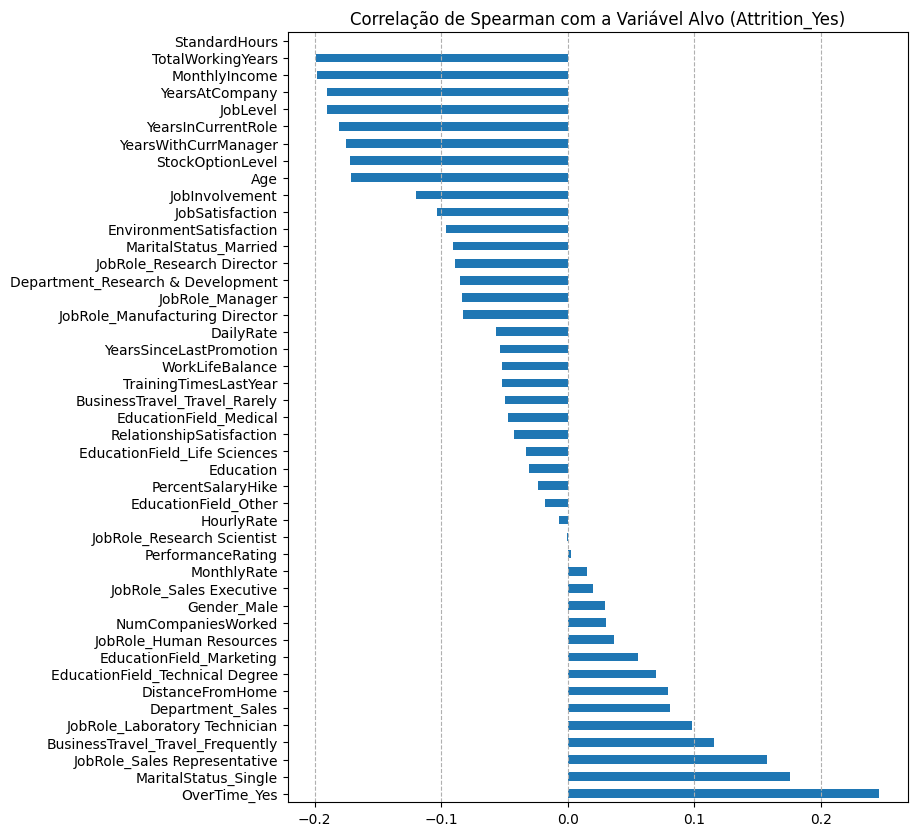

In [24]:
# Correlação entre target e demais features
# Calcula correlaçã de spearman
corr_table = df_final.corr(method='spearman')['Attrition_Yes']

# Ordena tabela de correlação
corr_ordenada = corr_table.sort_values(ascending=False)

print("--- Correlação de cada variável com 'Attrition_Yes' ---\n")
print(corr_ordenada.drop('Attrition_Yes'))

# Cria um gráfico de barras para visualizar melhor
plt.figure(figsize=(8, 10))

# Remove a correlação da própria variável alvo (sempre 1) para o gráfico
corr_ordenada.drop('Attrition_Yes').plot(kind='barh')
plt.title("Correlação de Spearman com a Variável Alvo (Attrition_Yes)")
plt.grid(axis='x', linestyle='--')
plt.show()

In [25]:
# Investiga maiores colinearidades bivariadas

# Obtem valores absolutos na matriz de covariância
corr_matriz_abs = corr_matriz.abs()

# Desempilha a matriz para criar uma lista de pares de correlação
corr_unstacked = corr_matriz_abs.unstack()

# Ordene a lista para ver os maiores valores no topo
corr_sorted = corr_unstacked.sort_values(ascending=False)

# 4. Filtre para remover a correlação de uma variável com ela mesma (que é sempre 1), remova os duplicados (a correlação de A com B é a mesma de B com A)
top_corr_pairs = corr_sorted[corr_sorted < 1].drop_duplicates()


print("--- Top 30 Pares Mais Correlacionados no Dataset ---")
print(top_corr_pairs.head(40))

--- Top 30 Pares Mais Correlacionados no Dataset ---
MonthlyIncome                      JobLevel                             0.920429
Department_Research & Development  Department_Sales                     0.906818
YearsInCurrentRole                 YearsAtCompany                       0.854000
YearsWithCurrManager               YearsAtCompany                       0.842803
JobRole_Sales Executive            Department_Sales                     0.808869
BusinessTravel_Travel_Frequently   BusinessTravel_Travel_Rarely         0.753092
JobLevel                           TotalWorkingYears                    0.734678
MaritalStatus_Single               StockOptionLevel                     0.733879
Department_Research & Development  JobRole_Sales Executive              0.733497
YearsWithCurrManager               YearsInCurrentRole                   0.724754
MonthlyIncome                      TotalWorkingYears                    0.710024
Age                                TotalWorkingYears    

In [26]:
# Determinar Fator de Inflação de Variância (VIF), multicolinearidade, entre as variáveis independentes
# Quanto a variância de um coeficiente é inflada pelas relações com outras variáveis
vif_data = pd.DataFrame()
vif_data["feature"] = df_final.columns
vif_data["VIF"] = [variance_inflation_factor(df_final.values, i) for i in range(len(df_final.columns))]

In [27]:
# Ordena df com VIF
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

print(" Multicolinearidade como VIF")
print(vif_data_sorted)

 Multicolinearidade como VIF
                              feature         VIF
15                      StandardHours  448.173324
25  Department_Research & Development   44.086479
26                   Department_Sales   43.979034
27       EducationField_Life Sciences   24.153814
29             EducationField_Medical   21.709578
9                       MonthlyIncome   18.122398
39            JobRole_Sales Executive   14.716860
7                            JobLevel   14.140403
28           EducationField_Marketing   10.902300
31    EducationField_Technical Degree    8.874453
33            JobRole_Human Resources    7.270197
30               EducationField_Other    6.055548
40       JobRole_Sales Representative    5.635881
17                  TotalWorkingYears    5.021008
20                     YearsAtCompany    4.764842
35                    JobRole_Manager    4.220731
38         JobRole_Research Scientist    3.542027
34      JobRole_Laboratory Technician    3.321076
42               Mari

* Feature engineering

In [28]:
# Cria índice entre
df_final['IncomeRateRatio']= df_final['MonthlyIncome']/df_final['MonthlyRate']

#Cria índice de % de cumprimento do standard hours
df_final['WorkingRatio'] = df_final['HourlyRate']/df_final['StandardHours']


# Cria índice xxxxx
# Convert categorical columns to numeric before multiplication
df_final['OverallSatisfaction'] = df_final['EnvironmentSatisfaction'].astype(int) * df_final['JobSatisfaction'].astype(int) * df_final['RelationshipSatisfaction'].astype(int)


df_final['OverallSatisfaction'] = df_final['OverallSatisfaction'].astype('category')



In [29]:
df_feature = df_final.copy()

In [30]:
df_feature = df_feature.drop(columns=['HourlyRate','StandardHours','EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction'], axis=1)

- Várias colinearidades com valores significantes: tratar!
- Multicolinearidade reduz o poder estatístico de um modelo
- Em datasets com multicolineariade, pequenas alterações nos dados podem levar a grandes alterações nas estimativas dos parâmetros, até mesmo inversões de sinal.

Fontes consultadas:
https://stats.stackexchange.com/tags/multicollinearity/info

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/



In [31]:
#vif_data_sorted.feature.values

##### 📑 Resumo Executivo - Análise Exploratória Multivatiada

**1. MonthlyRate X MonthlyIncome**: A análise exploratória revela uma relação não linear entre as variáveis MonthlyRate (remuneração base contratual) e MonthlyIncome (renda mensal efetiva), conforme evidenciado pelos seguintes padrões nos dados amostrais:

* Casos com Income > Rate (e.g., registro #8: ratio = 1.08) sugerem a existência de:
 - Componentes variáveis (bônus, comissões)
 - Horas extras
 - Outras formas de remuneração não incluídas no salário base

* Casos com Income < Rate (e.g., registro #0: ratio = 0.31) indicam possíveis:
 - Deduções salariais
 - Períodos incompletos de trabalho
 - Diferenças entre salário pro rata e valor contratual

Proximidade de valores (e.g., registro #2: ratio = 0.87) pode representar:

 - Cargos não sujeitos a variações remuneratórias
 - Posições com carga horária reduzida

____




## | ✅ PRÉ-PROCESSAMENTO DOS DADOS PARA MODELAGEM

### Subtask:
Prepare the data for machine learning models. This will involve encoding categorical variables and splitting the data into training and testing sets.


## | 💻 MODELAGEM PREDITIVA

## | 📋 AVALIAÇÃO DOS MODELOS

## | 📍 CONCLUSÃO